In [ ]:
# using Revise

In [1]:
using Knet

In [2]:
# pkg"add Knet#master"

In [3]:
# using ImageView;

In [10]:
include("../helper.jl")
include("accuracy.jl")
include("loss.jl")
include("mpii.batcher.jl")
include("../models.jl")
include("../training.jl")
include("../plots.jl")
include("../modular.resnet.jl")

generate_deeper_cut (generic function with 1 method)

In [11]:
dtrn_single, dtst_single, data_items_single = get_mpii_single_person_batches_and_data_items()

1
1024-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
1025
(786432, 1024)
2048-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
2049
(786432, 2048)
3072-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
3073
(786432, 3072)
4096-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
4097
(786432, 4096)
5120-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
5121
(786432, 5120)
6144-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
6145
(786432, 6144)
7168-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
7169
(786432, 7168)
8192-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
8193
(786432, 8192)
9216-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}
9217
(786432, 9216)
10240-element Data{Tuple{KnetArray{Float32,N} where N,KnetArra

(18432-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}, 753-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}, DataItem[DataItem(1, "/userfiles/gsoykan20/mpii_human_pose/cropped/im18002_1.png", [3.0 512.0 512.0], Int32[1 242 385; 2 189 314; … ; 13 248 141; 14 211 82], true, Dict{String,Any}("objpos" => Dict{String,Any}("x" => 208.96442562694062,"y" => 267.4759854225754),"x1" => 194.96086302600244,"y1" => 78.473532002716,"annopoints" => Dict{String,Any}("point" => Dict{String,Any}("x" => Any[199.7411157847829 179.9768804087305 … 208.96442562694062 160.21264503267815],"id" => Any[6.0 7.0 … 14.0 15.0],"is_visible" => Any[false false … true true],"y" => Any[270.1112168060491 167.3371928505767 … 230.5827460539443 259.57029127215446])),"x2" => 263.37295197318434,"y2" => 144.29004271467136,"scale" => 1.5178932768808222)), DataItem(2, "/userfiles/gsoykan20/mpii_human_pose/cropped/im04418_1.png", [3.0 512.0 512.0], Int32[3 222 426; 4 2

In [12]:
Knet.save("dtrn_single.jld2", "dtrn_single", dtrn_single)

In [13]:
Knet.save("dtst_single.jld2", "dtst_single", dtrn_single)

In [14]:
Knet.save("data_items_single.jld2", "data_items_single", data_items_single)

In [86]:
dtrn, dval, dtst, data_items = get_mpii_batches_and_data_items(1; should_shuffle=true);
trn_data_items = data_items[begin : end - validation_image_count - test_image_count];
val_data_items = data_items[end - validation_image_count - test_image_count + 1 : end - test_image_count]
tst_data_items = data_items[end - test_image_count + 1 : end];

1
1024-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}


In [3]:
dtrn = Knet.load("29-12-20-dtrn.jld2", "29-12-20-dtrn")

25600-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}

In [4]:
dval = Knet.load("29-12-20-dval.jld2", "29-12-20-dval")

3283-element Data{Tuple{KnetArray{Float32,N} where N,KnetArray{Float32,N} where N}}

In [44]:
#trn_data_items = Knet.load("29-12-20-trn_data_items.jld2", "29-12-20-trn_data_items")

In [5]:
val_data_items = Knet.load("29-12-20-val_data_items.jld2", "29-12-20-val_data_items");

In [6]:
model = Knet.load("29-12-20-training_model.jld2", "29-12-20-training_model")

Chain((ResLayerX1_50(BatchNormLayer(K32(128)[1.0913312⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,64,1)[0.14145072⋯], K32(1,1,64,1)[0.03843275⋯], zeros, ones)), P(KnetArray{Float32,4}(7,7,3,64)), P(KnetArray{Float32,4}(1,1,64,1)), 3, 2, 3, 2, 1), ResLayerX5(ResLayerX3(ResLayerX0(BatchNormLayer(K32(512)[0.30266267⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,256,1)[-0.15347853⋯], K32(1,1,256,1)[0.028956868⋯], zeros, ones)), P(KnetArray{Float32,4}(1,1,64,256)), 0, 1, 1), ResLayerX2(ResLayerX1(ResLayerX0(BatchNormLayer(K32(128)[0.8936078⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,64,1)[-3.0701911⋯], K32(1,1,64,1)[0.6297425⋯], zeros, ones)), P(KnetArray{Float32,4}(1,1,64,64)), 0, 1, 1), false), ResLayerX1(ResLayerX0(BatchNormLayer(K32(128)[1.0477029⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,64,1)[0.5202805⋯], K32(1,1,64,1)[0.35945126⋯], zeros, ones)), P(KnetArray{Float32,4}(3,3,64,64)), 1, 1, 1), false), ResLayerX0(BatchNormLayer(K32(512)[0.70080197⋯], Knet.Ops20.BNMoments(0.1f0, K32(1,1,256,1)[0.15136625⋯

In [46]:
dtrn.shuffle = false
dtrn_first_two_batch = collect(take(dtrn, 2))
dtrn_x1, dtrn_y1 = first(dtrn)
dval_x1, dval_y1 = first(dval)
dtrn.shuffle = true

true

In [50]:
deeper_cut_without_loc_ref = generate_deeper_cut();

In [15]:
deeper_cut_with_loc_ref = generate_deeper_cut(; is_loc_ref_enabled = true);

In [755]:
#  TODO: check resnet implementation for its regularizations

In [55]:
#deeper_cut_without_loc_ref(dval)

In [56]:
#model_end_results(deeper_cut_with_loc_ref, dtrn, dval; 
#    train_data_items=nothing,
#    validation_data_items=val_data_items)

In [96]:
model_end_results(deeper_cut_without_loc_ref, dtrn_2k, dval_2k; 
    train_data_items=trn_data_items,
    validation_data_items=val_data_items);

train_acc_PCKh: 0.2828051655311874
train_loss: 0.020552090019918978
train_acc: 0.04854910714285712
validation_PCKh: 0.2681170997923558
validation_loss: 0.021801844472065568
validation_acc: 0.044642857142857144


In [38]:
CUDA.reclaim()
CUDA.memory_status()
GC.gc(true)

Effective GPU memory usage: 5.10% (770.000 MiB/14.756 GiB)
CUDA allocator usage: 138.015 MiB
binned usage: 3.469 KiB (3.469 KiB allocated, 0 bytes cached)
Discrepancy of 138.012 MiB between memory pool and allocator!


In [14]:
deeper_cut_without_loc_ref_results = trainresults("resnet_with_deconv.jld2",
    deeper_cut_without_loc_ref,
    dtrn_2k,
    dval_2k, [(0.05, 20)]; 
    accuracy_func=nothing,
    error_func=nothing,
    secondary_accuracy_func=modelized_PCKh_sigm,
        data_items_trn=trn_data_items,
        data_items_val=val_data_items
    );

┣████████████████████┫ [100.00%, 1280/1280, 43:11/43:11, 2.02s/i] 


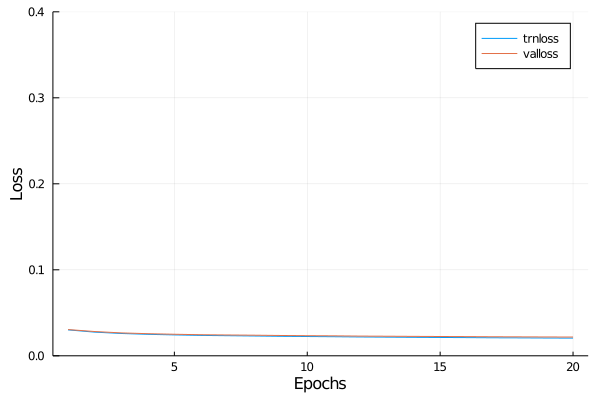

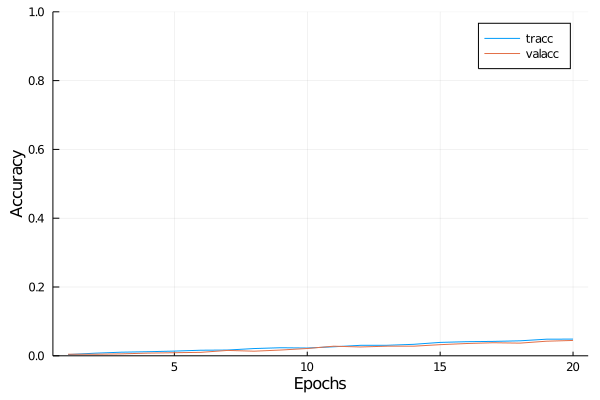

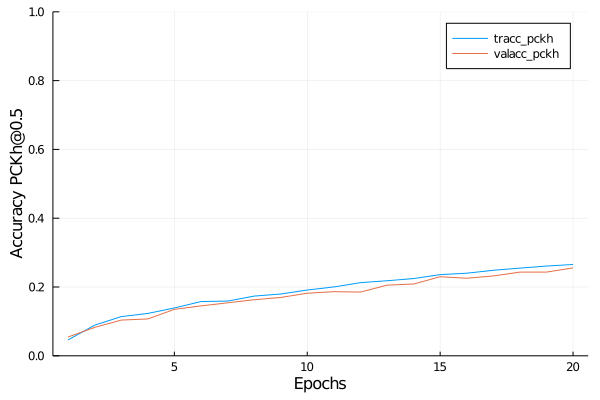

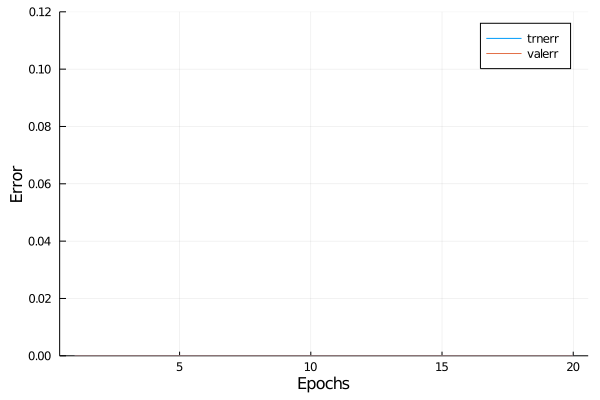

In [15]:
draw_plots(deeper_cut_without_loc_ref_results)

In [ ]:
   deeper_cut_with_loc_ref_results = trainresults(
        "03-01-21-single",
        deeper_cut_with_loc_ref,
        dtrn_single,
        nothing,
        [(0.005, 1), (0.02, 17)];
        accuracy_func = nothing,
        error_func = nothing,
        secondary_accuracy_func = nothing,
        data_items_trn = nothing,
        data_items_val = nothing,
        check_loss = false
    )

┣███████████████████▉┫ [100.00%, 18432/18432, 40:36/40:36, 7.57i/s] 


(0, 0, 0, 0, 0, 0, 0, 0, 0)


┣█▏                  ┫ [5.88%, 18425/313344, 40:17/11:25:06, 7.61i/s] 

(0, 0, 0, 0, 0, 0, 0, 0, 0)


┣██                  ┫ [10.21%, 31977/313344, 01:09:53/11:24:49, 7.66i/s] Excessive output truncated after 524302 bytes.

In [ ]:
#=
- [0.005, 10000]
- [0.02, 430000]
- [0.002, 730000]
- [0.001, 1030000]
=#

In [7]:
#=
We train networks with SGD for 1M iterations,
starting with the learning rate lr=0.001 for 10k,
then lr=0.002 for 420k,
lr=0.0002 for 300k and
lr=0.0001 for 300k. This corresponds to roughly 17 epochs of the MPII=#
deeper_cut_with_loc_ref_results = trainresults("29-12-20-continue",
    model,
    dtrn,
    dval, [(0.002, 8), (0.001, 12)]; 
    accuracy_func=nothing,
    error_func=nothing,
    secondary_accuracy_func=modelized_PCKh_sigm,
        data_items_trn=nothing,
        data_items_val=val_data_items
    );

┣██▍                 ┫ [12.50%, 25598/204800, 58:59/07:51:56, 7.30i/s] 

(0, 0.013955040275182904, 0.01395504027302751, 0, 0, 0, 0, 0, 0.5217468421854654)


┣████▊               ┫ [24.20%, 49556/204800, 02:24:00/09:55:08, 6.97i/s] ] Excessive output truncated after 524297 bytes.

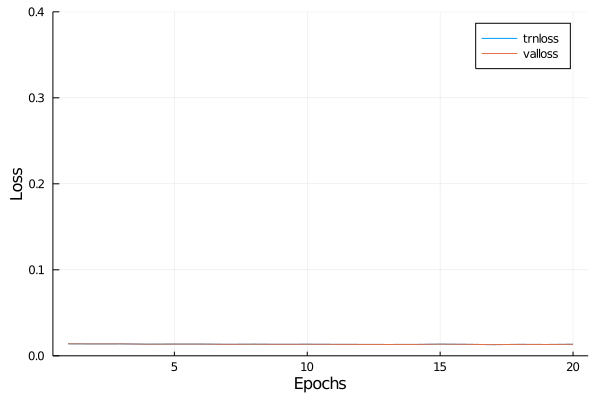

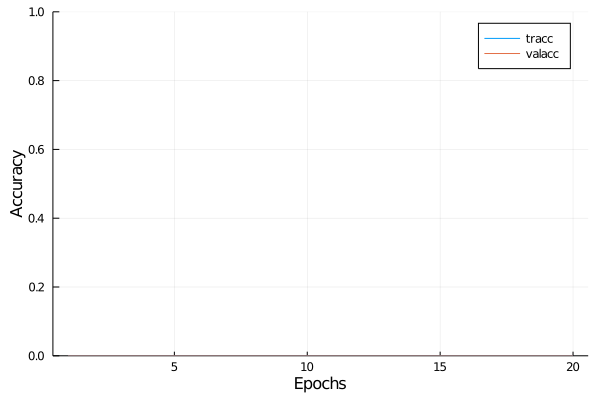

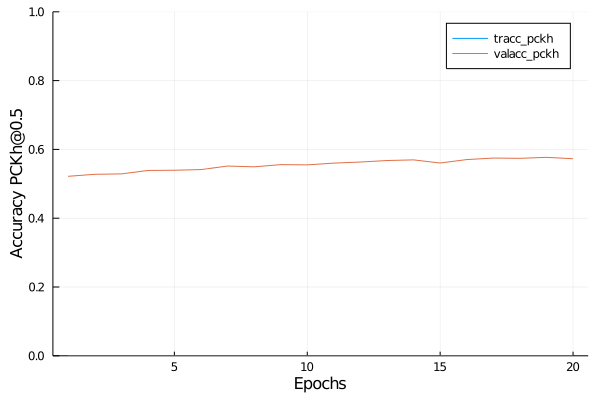

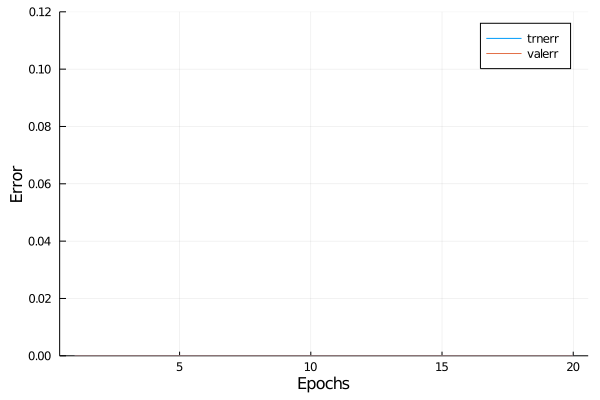

In [8]:
draw_plots(deeper_cut_with_loc_ref_results)

In [ ]:
# Experimental Zone

In [ ]:
sigmoided_output = Array(sigm.(resnet_with_deconv(dtrn_x1)));

In [ ]:
sigmoided_output = Array(sigm.(loadedResNet(dtrn_x1)));

In [ ]:
sigmoided_output[ sigmoided_output .< output_consider_threshold] .= 0  ;

In [ ]:
test_image_order = 7;

In [ ]:
gt_joint_images = draw_score_maps(Array(dtrn_y1), test_image_order);

In [ ]:
pred_joint_images = draw_score_maps(sigmoided_output, test_image_order);

In [ ]:
pred_joint_images[14]

In [ ]:
gt_joint_images[14]

In [ ]:
images = []
for (i, joint_sc) in enumerate(gt_joint_images)
img = show_scmap_on_image(test_image, joint_sc;
        fill_value=1, 
        should_use_scmap_size=true,
    display_name=i)
    push!(images, img)
end

In [ ]:
mosaicify(images; ncol=3)

In [ ]:
show_scmap_on_image(test_image, pred_joint_images[13]; fill_value=1);

In [ ]:
should_use_output_sized = false
test_image = Array(dtrn_x1_2k)[:, :, :, test_image_order];
output_sized_test_image = imresize(test_image, 32, 32);
perm = permutedims( should_use_output_sized ? output_sized_test_image : test_image, [3, 1, 2])
colored = colorview(RGB, perm);
fetch(display(colored));
#colorview(RGB, rand(3,256,256))

In [ ]:
#  Experimental Section

In [ ]:
first(dtrn)[1] |> size

In [ ]:
first(dtrn)[2] |> size

In [ ]:
#julia> w0 = KnetArray(randn(Float32, 5, 5, 1, 20));

#julia> x0 = KnetArray(rand(Float32, 24, 24, 20, 100));

#julia> size(deconv4(w0,x0)) # this output does not make it sense, it should give what I want
#(28, 28, 20, 100)
#

w0 = KnetArray(randn(Float32, 5, 5, 1, 20));
 x0 = KnetArray(rand(Float32, 4, 4, 2048, 32));

 # this output does not make it sense, it should give what I want
#(28, 28, 20, 100)

In [ ]:
dec_layer = Deconv(4, 4, 14, 2048; padding=1, stride=2, atype=Knet.atype())

In [ ]:
mock = randn(Float32, 16, 16, 2048, 32)
mock = convert(Knet.atype(), mock);

In [ ]:
size(dec_layer(mock))

In [ ]:
size(deconv4(w0, x0))

In [ ]:
tc = Conv2(3, 3, 3, 3)

In [ ]:
fb = first(dtrn)[1];

In [ ]:
res_tc = tc2(fb) |> tc;

In [ ]:
mid = res_tc |> tc2

In [ ]:
w1 = KnetArray(randn(Float32, 3, 3, 1, 3));

In [ ]:
#deconv4(w1, mid)
size(deconv4(w1, mid; padding=1))

In [ ]:
tc2 = ResLayerConv(3, 3, 3, 3; stride=2, padding=1)

In [ ]:
res_tc2 = res_tc |> tc2;

In [ ]:
size(res_tc)

In [ ]:
tc2(fb) |> tc2 |> tc2;